In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

### Load data

In [2]:
yolo_params = pd.read_csv('../data/processed.csv')
yolo_params.head()

,ckpt_name,training_hyperparams.cosine_final_lr_ratio,training_hyperparams.optimizer,training_hyperparams.batch_accumulate,training_hyperparams.lr_mode,training_hyperparams.phase_callbacks,training_hyperparams.initial_lr.backbone,training_hyperparams.initial_lr.default,training_hyperparams.max_epochs,dataset_params.train_dataset_params,...,Recall@0.50:0.95,mAP@0.50:0.95,F1@0.50:0.95,AP@0.50:0.95_Mass,AP@0.50:0.95_Calcification,Best_score_threshold,Best_score_threshold_Mass,Best_score_threshold_Calcification,training_hyperparams.lr_decay_factor,Target
0,RUN_20240612_100027_359642,0.1,Adam,1,CosineLRScheduler,['<super_gradients.training.utils.callbacks.ca...,0.10,0.10,50,"{'data_dir': '../data/', 'images_dir': 'train/...",...,0.005259,0.000007,0.000182,0.000010,0.000004,0.11,0.11,0.22,0.0,0
1,RUN_20240617_163510_293224,0.1,Adam,1,CosineLRScheduler,['<super_gradients.training.utils.callbacks.ca...,0.10,0.10,50,"{'data_dir': '../data/', 'images_dir': 'train/...",...,0.011994,0.000007,0.000235,0.000006,0.000009,0.11,0.11,0.22,0.0,0
2,RUN_20240620_104658_182467,0.1,AdamW,1,CosineLRScheduler,['<super_gradients.training.utils.callbacks.ca...,0.10,0.10,75,"{'data_dir': '../data/', 'images_dir': 'train/...",...,0.076085,0.005795,0.001406,0.000080,0.011509,0.25,0.10,0.25,0.0,0
3,RUN_20240624_175224_278149,0.1,AdamW,1,CosineLRScheduler,['<super_gradients.training.utils.callbacks.ca...,0.01,0.01,75,"{'data_dir': '../data/', 'images_dir': 'train/...",...,0.119091,0.011001,0.002431,0.000340,0.021661,0.25,0.18,0.25,0.0,0
4,RUN_20240625_113055_125920,0.1,AdamW,1,CosineLRScheduler,['<super_gradients.training.utils.callbacks.ca...,0.01,0.01,100,"{'data_dir': '../data/', 'images_dir': 'train/...",...,0.147835,0.015902,0.003215,0.000385,0.031419,0.25,0.18,0.25,0.0,0


### Feature and target Selection

In [3]:
non_features = ['ckpt_name', 'dataset_params.train_dataloader_params.collate_fn', 'dataset_params.valid_dataloader_params.collate_fn', 
                'training_hyperparams.phase_callbacks','Precision@0.50:0.95', 'Recall@0.50:0.95', 'mAP@0.50:0.95', 'F1@0.50:0.95', 
                'dataset_params.train_dataset_params', 'dataset_params.valid_dataset_params',
                'AP@0.50:0.95_Mass', 'AP@0.50:0.95_Calcification', 'Best_score_threshold',
                'Best_score_threshold_Mass', 'Best_score_threshold_Calcification', 'Target']
X = yolo_params.drop(columns=non_features)
y = yolo_params['Target']
#X.head()


### Convert categorical variables into indicators

In [4]:
X = pd.get_dummies(X, dtype=int)
#X = X.astype(int) 

X.to_csv('../data/dummies.csv', index=False)

### Data split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

### Building decision tree model

(13, 16)
16


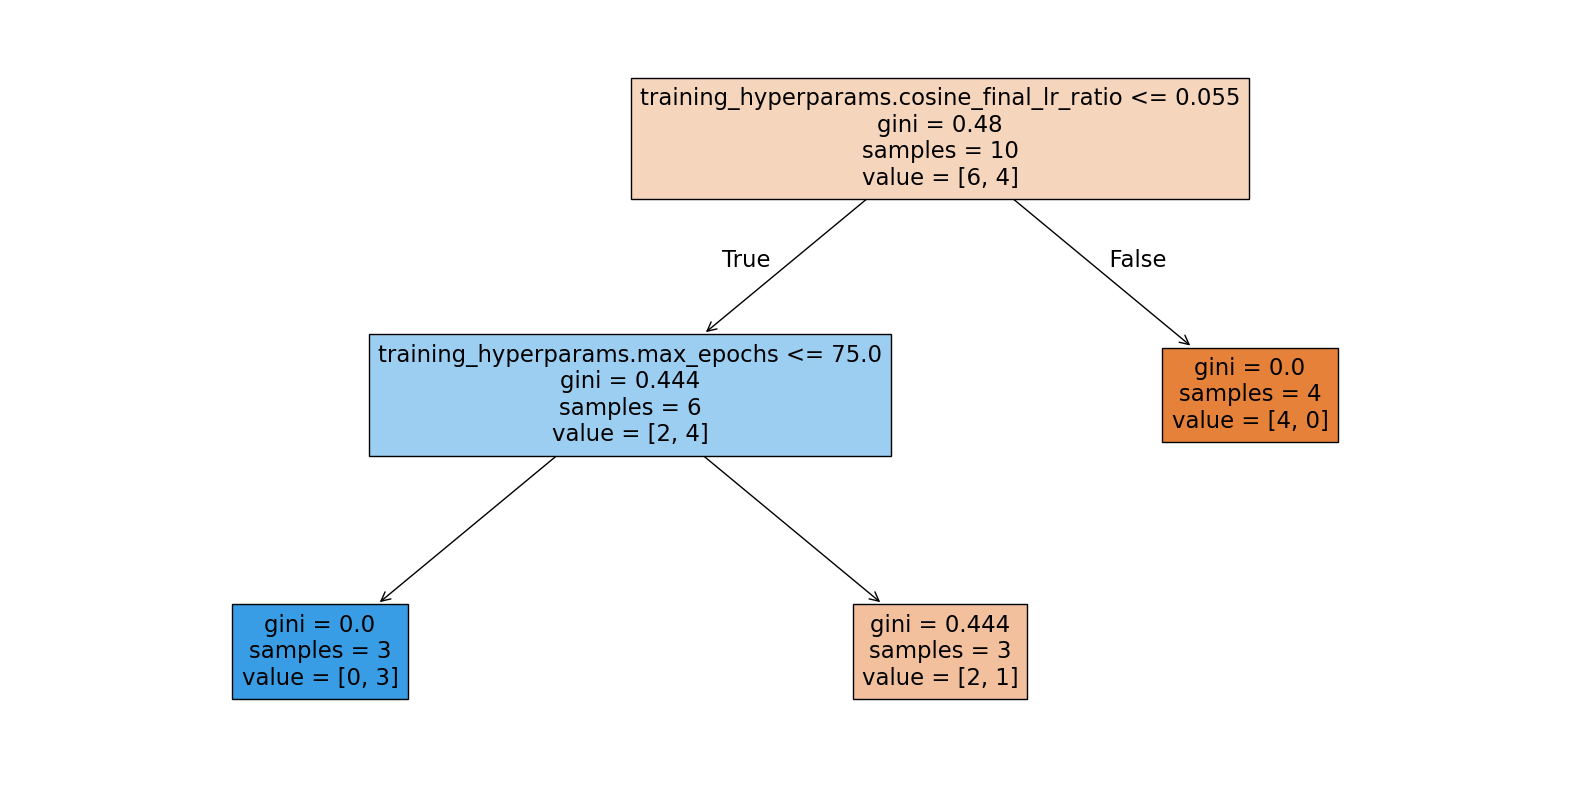

In [6]:
# Create Decision Tree classifer object
dtree = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtree = dtree.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtree.predict(X_test)

feature_names = X.columns
print (X.shape)

print (dtree.n_features_in_)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=feature_names, filled=True)
plt.show()


### Predict values

In [7]:
print(dtree.predict(X_test))

[0 0 0]


In [8]:
inference = pd.read_csv('../data/inference.csv')
print(dtree.predict(inference))

[0 0 1 0]


### Evaluate model

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))